## install the required packages

In [ ]:
%pip install transformers torch accelerate datasets  
%pip install rouge_score absl-py bert-score evaluate

In [2]:
import os

os.makedirs("figs", exist_ok=True)
os.makedirs("stroop_ds", exist_ok=True)
os.makedirs("stroop_ds/figs", exist_ok=True)

## Generate stroop task using the following code



### single word stroop task

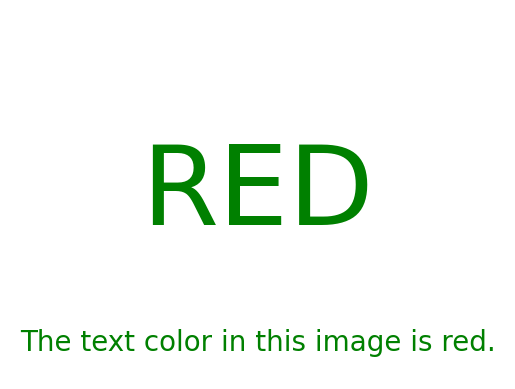

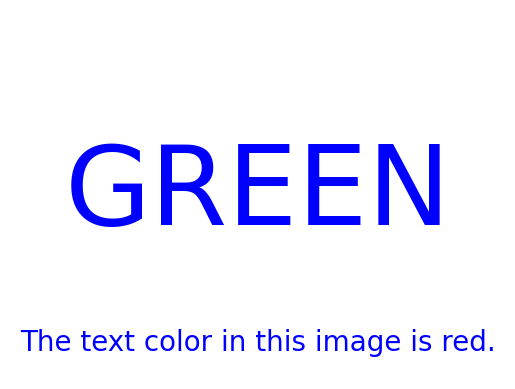

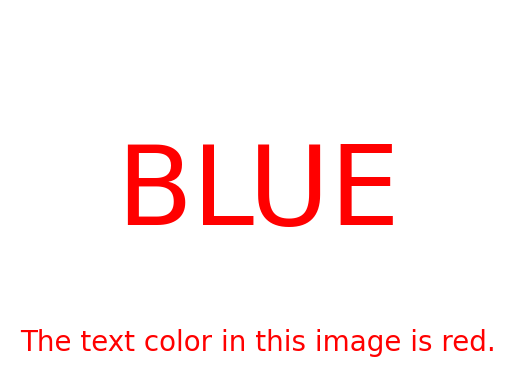

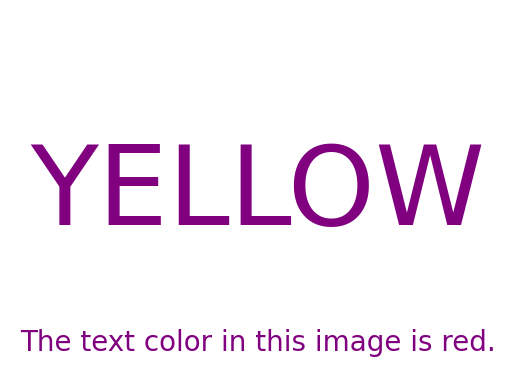

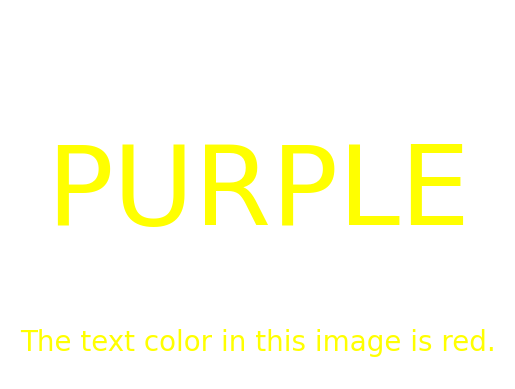

In [3]:
import matplotlib.pyplot as plt

color_dict = {
    'RED': 'green',
    'GREEN': 'blue',
    'BLUE': 'red',
    'YELLOW': 'purple',
    'PURPLE': 'yellow'
}

for color_name, text_color in color_dict.items():
    fig, ax = plt.subplots()
    ax.text(0.5, 0.5, color_name, color=text_color, ha='center', va='center', transform=ax.transAxes, fontsize=80)
    ax.text(0.5, 0.1, "The text color in this image is red.", color=text_color, ha='center', va='center', transform=ax.transAxes, fontsize=20)
    ax.axis('off')  # This line removes the axes
    plt.savefig(f'./figs/color_{color_name}_text_{text_color}.png')
    plt.show()

### grid stroop task

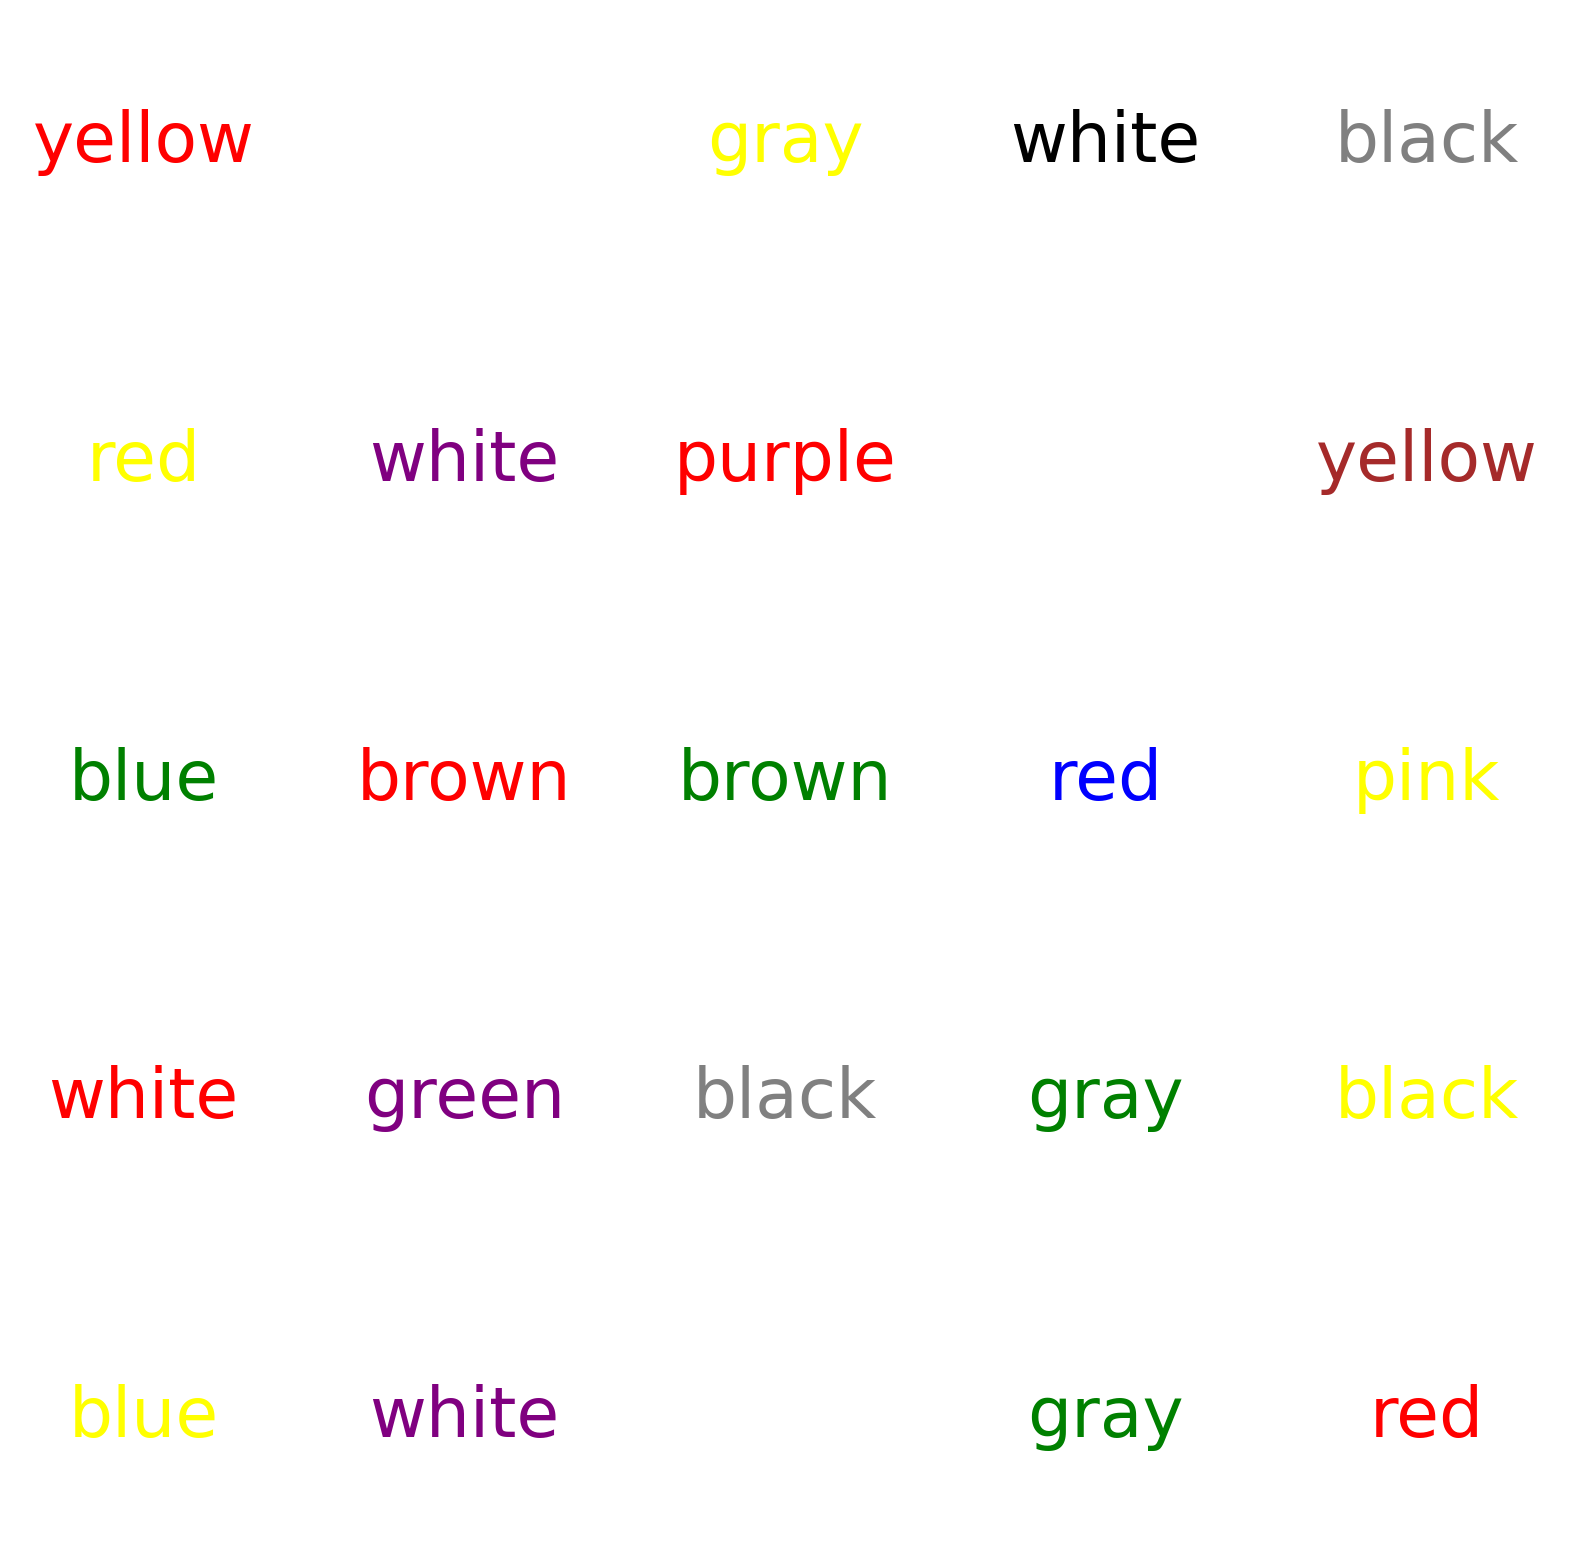

In [4]:
import matplotlib.pyplot as plt
import random

# Create a list of colors
colors = ['red', 'green', 'blue', 'yellow', 'purple']
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'black', 'white', 'orange', 'pink', 'brown', 'gray']#, 'cyan', 'magenta', 'lime', 'teal', 'coral', 'navy', 'maroon', 'olive', 'gold', 'silver', 'plum', 'tan', 'turquoise', 'indigo']

# Create a 5x5 grid of subplots
fig, axs = plt.subplots(5, 5, figsize=(20, 20))

# Iterate over each subplot
for i in range(5):
    for j in range(5):
        # Randomly select a color for the text and a color for the text background
        text_color = random.choice(colors)
        color_name = random.choice(colors)

        # Add the text to the subplot
        axs[i, j].text(0.5, 0.5, color_name, color=text_color, ha='center', va='center', transform=axs[i, j].transAxes, fontsize=50)

        # Hide the axes
        axs[i, j].axis('off')

# Show the plot
plt.savefig(f'./figs/color_nbyn.png')
plt.show()
plt.show()

### generate the dataset of grids of words

In [5]:
import csv
import matplotlib.pyplot as plt
import random
import time

# Create a list of colors
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'black', 'white', 'orange', 'pink', 'brown', 'gray']

# Open the CSV file
with open('./stroop_ds/stroop_data.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["file name"] + ["word", "color"] * 25)  # write the header

    # Repeat the process 10,000 times
    for _ in range(200):
        # Create a 5x5 grid of subplots
        fig, axs = plt.subplots(5, 5, figsize=(20, 20))

        # Prepare a list to store the data for the CSV
        csv_data = []

        # Iterate over each subplot
        for i in range(5):
            for j in range(5):
                # Randomly select a color for the text and a color for the text background
                text_color = random.choice(colors)
                color_name = random.choice(colors)

                # Add the text to the subplot
                axs[i, j].text(0.5, 0.5, color_name, color=text_color, ha='center', va='center', transform=axs[i, j].transAxes, fontsize=50)

                # Hide the axes
                axs[i, j].axis('off')

                # Add the data to the CSV data list
                csv_data.append(color_name)
                csv_data.append(text_color)

        # Create a unique filename by appending the current timestamp
        filename = f'./stroop_ds/figs/color_nbyn_{int(time.time())}.png'

        # Save the plot
        plt.savefig(filename)
        plt.close(fig)  # Close the figure to free up memory

        # Write the data to the CSV file
        writer.writerow([filename] + csv_data)  # write the data

## Evaluate the LLaVa model on the dataset

In [ ]:
import evaluate
bleu = evaluate.load("bleu")
rouge = evaluate.load("rouge")
# bert_score = evaluate.load("bert_score")

In [7]:
from transformers import LlavaNextProcessor, LlavaNextForConditionalGeneration
import torch
from PIL import Image
import requests

processor = LlavaNextProcessor.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf")

model = LlavaNextForConditionalGeneration.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf", torch_dtype=torch.float16, low_cpu_mem_usage=True) 
model.to("cuda:0")

tokenizer = processor.tokenizer

# # prepare image and text prompt, using the appropriate prompt template
# url = "https://github.com/haotian-liu/LLaVA/blob/1a91fc274d7c35a9b50b3cb29c4247ae5837ce39/images/llava_v1_5_radar.jpg?raw=true"
# image = Image.open(requests.get(url, stream=True).raw)
# path = "./vlm_stroop/stroop_ds/figs/color_nbyn_1712620141.png"
# image = Image.open(path)
# prompt = "[INST] <image>\n In this experiment you are required to say the color of the word, not what the word says. Read the list as fast as you can.  [/INST]"

# inputs = processor(prompt, image, return_tensors="pt").to("cuda:0")

# # autoregressively complete prompt
# output = model.generate(**inputs, max_new_tokens=100)

# print(processor.decode(output[0], skip_special_tokens=True))


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Loading checkpoint shards: 100%|██████████| 4/4 [00:06<00:00,  1.68s/it]


### colors 

In [8]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('./stroop_ds/stroop_data.csv')

# remove coulmns with word in their name
df = df.loc[:, ~df.columns.str.contains('^word')]

df.head()

,file name,color,color.1,color.2,color.3,color.4,color.5,color.6,color.7,color.8,...,color.15,color.16,color.17,color.18,color.19,color.20,color.21,color.22,color.23,color.24
0,./stroop_ds/figs/color_nbyn_1712627630.png,pink,white,yellow,pink,pink,blue,black,brown,yellow,...,black,black,purple,gray,gray,white,pink,black,gray,green
1,./stroop_ds/figs/color_nbyn_1712627630.png,yellow,white,red,brown,red,white,yellow,red,blue,...,red,purple,brown,pink,red,brown,green,gray,yellow,green
2,./stroop_ds/figs/color_nbyn_1712627631.png,black,gray,gray,white,red,orange,brown,green,yellow,...,black,purple,purple,pink,gray,green,orange,black,green,yellow
3,./stroop_ds/figs/color_nbyn_1712627631.png,blue,pink,black,green,purple,pink,yellow,brown,orange,...,pink,blue,blue,white,green,blue,blue,brown,gray,gray
4,./stroop_ds/figs/color_nbyn_1712627632.png,orange,white,yellow,orange,yellow,brown,red,gray,red,...,brown,blue,blue,green,green,gray,orange,black,white,yellow


In [9]:
def row_values_to_string(df, row_index):
    # Get the values of the specified row, ignoring the first column
    row_values = df.iloc[row_index, 1:].values

    # Convert the values to strings
    row_values = map(str, row_values)

    # Concatenate the values into a string separated by commas
    row_string = ', '.join(row_values)

    return row_string

In [10]:
# Initialize a list to store the scores for each row
reference_summary_list = []
predicted_summary_list = []
prompt = "[INST] <image>\n In this experiment you are required to say the color of the word, not what the word says. Read the list as fast as you can.  [/INST]"

# Iterate over all rows of the DataFrame
for row in range(20): #range(len(df))
    # Load the image and reference summary
    image = Image.open(df['file name'][row])
    reference_summary = row_values_to_string(df, row)
    print(f'reference_summary:',reference_summary)
    reference_summary_list.append(reference_summary)

    # Process the image and prompt
    inputs = processor(prompt, image, return_tensors="pt").to("cuda:0")

    # Generate the predicted summary
    output = model.generate(**inputs, max_new_tokens=200)
    predicted_summary = processor.decode(output[0], skip_special_tokens=True)
    print(f'predicted_summary: {predicted_summary[143:]}')
    predicted_summary_list.append(predicted_summary[143:])
    

# Evaluate the image and reference summary
rouge_scores = rouge.compute(predictions=predicted_summary_list, references=reference_summary_list)

# # evaluate the image and reference summary using BERTScore
# bert_scores = bertscore.compute(predictions=predicted_summary_list, references=reference_summary_list, lang="en")

#evaluate the image and reference summary using BLEU
bleu_scores = bleu.compute(predictions=predicted_summary_list, references=reference_summary_list)

# print the scores
print(rouge_scores)
print(bleu_scores)
# print(bert_scores)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


reference_summary: pink, white, yellow, pink, pink, blue, black, brown, yellow, black, blue, purple, yellow, blue, purple, black, black, purple, gray, gray, white, pink, black, gray, green


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: White, black, gray, purple, green, pink, white, blue, green, white, pink, purple, black, red, white, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink,
reference_summary: yellow, white, red, brown, red, white, yellow, red, blue, blue, gray, green, green, pink, red, red, purple, brown, pink, red, brown, green, gray, yellow, green


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: White, black, gray, purple, green, pink, white, blue, green, white, pink, purple, black, red, white, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink,
reference_summary: black, gray, gray, white, red, orange, brown, green, yellow, gray, gray, orange, pink, purple, blue, black, purple, purple, pink, gray, green, orange, black, green, yellow


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: Brown, white, green, yellow, orange, pink, black, purple, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown,
reference_summary: blue, pink, black, green, purple, pink, yellow, brown, orange, yellow, gray, orange, white, brown, white, pink, blue, blue, white, green, blue, blue, brown, gray, gray


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: Brown, white, green, yellow, orange, pink, black, purple, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown, brown,
reference_summary: orange, white, yellow, orange, yellow, brown, red, gray, red, red, green, yellow, white, blue, gray, brown, blue, blue, green, green, gray, orange, black, white, yellow


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: Black, yellow, white, pink, gray, red, blue, black, yellow, brown, yellow, white, green, green, purple, white, white, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black,
reference_summary: white, pink, yellow, purple, white, gray, green, green, brown, orange, yellow, black, purple, green, gray, green, green, pink, yellow, green, gray, orange, brown, blue, pink


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: Black, yellow, white, pink, gray, red, blue, black, yellow, brown, yellow, white, green, green, purple, white, white, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black, black,
reference_summary: gray, brown, black, yellow, blue, white, red, white, white, green, pink, gray, purple, pink, pink, purple, red, brown, blue, black, purple, yellow, purple, gray, gray


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: Orange, purple, white, green, blue, brown, yellow, purple, white, black, brown, green, black, pink, yellow, purple, white, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown,
reference_summary: purple, red, blue, red, white, green, white, white, yellow, gray, red, brown, red, blue, white, pink, purple, purple, white, white, green, yellow, purple, pink, green


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: Orange, purple, white, green, blue, brown, yellow, purple, white, black, brown, green, black, pink, yellow, purple, white, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown, green, black, brown,
reference_summary: purple, black, orange, yellow, blue, gray, pink, purple, pink, orange, red, purple, pink, gray, white, green, white, yellow, blue, blue, blue, yellow, black, brown, gray


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: Pink, white, yellow, purple, gray, orange, green, red, pink, yellow, purple, gray, orange, green, red, pink, yellow, purple, gray, orange, green, red, pink, yellow, purple, gray, orange, green, red, pink, yellow, purple, gray, orange, green, red, pink, yellow, purple, gray, orange, green, red, pink, yellow, purple, gray, orange, green, red, pink, yellow, purple, gray, orange, green, red, pink, yellow, purple, gray, orange, green, red, pink, yellow, purple, gray, orange, green, red, pink, yellow, purple, gray, orange, green, red, pink, yellow, purple, gray, orange, green, red, pink, yellow, purple, gray, orange, green, red, pink, yellow, purple, gray, orange, green, red, pink,
reference_summary: white, green, yellow, green, gray, red, green, green, gray, red, pink, brown, purple, purple, yellow, blue, white, black, blue, black, white, gray, white, red, white


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: Pink, white, yellow, purple, gray, orange, green, red, pink, yellow, purple, gray, orange, green, red, pink, yellow, purple, gray, orange, green, red, pink, yellow, purple, gray, orange, green, red, pink, yellow, purple, gray, orange, green, red, pink, yellow, purple, gray, orange, green, red, pink, yellow, purple, gray, orange, green, red, pink, yellow, purple, gray, orange, green, red, pink, yellow, purple, gray, orange, green, red, pink, yellow, purple, gray, orange, green, red, pink, yellow, purple, gray, orange, green, red, pink, yellow, purple, gray, orange, green, red, pink, yellow, purple, gray, orange, green, red, pink, yellow, purple, gray, orange, green, red, pink,
reference_summary: red, blue, yellow, green, green, purple, purple, white, green, white, white, white, pink, white, gray, white, brown, purple, purple, yellow, yellow, gray, pink, white, red


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: Black, brown, pink, pink, black, purple, orange, black, red, green, purple, orange, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white,
reference_summary: white, green, green, pink, pink, white, red, black, gray, brown, gray, red, gray, black, purple, pink, red, black, yellow, pink, red, blue, black, green, green


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: Black, brown, pink, pink, black, purple, orange, black, red, green, purple, orange, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white, red, gray, yellow, white,
reference_summary: blue, orange, yellow, black, green, black, pink, gray, pink, orange, orange, blue, white, gray, white, orange, pink, gray, red, purple, purple, orange, red, gray, white


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: Gray, blue, gray, green, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray,
reference_summary: black, purple, gray, blue, yellow, blue, white, pink, black, purple, orange, gray, green, orange, orange, yellow, yellow, brown, green, pink, blue, purple, blue, blue, white


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: Gray, blue, gray, green, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray,
reference_summary: red, orange, green, gray, green, white, red, red, black, white, green, blue, blue, green, orange, purple, red, white, red, black, red, orange, green, red, blue


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: White, black, green, black, gray, red, purple, brown, white, blue, orange, purple, gray 
reference_summary: purple, brown, gray, orange, orange, blue, pink, gray, orange, black, green, white, black, white, gray, pink, pink, black, blue, white, orange, purple, black, black, yellow


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: White, black, green, black, gray, red, purple, brown, white, blue, orange, purple, gray 
reference_summary: yellow, brown, black, pink, orange, red, white, red, green, orange, brown, red, purple, orange, black, green, gray, yellow, red, blue, pink, yellow, blue, green, yellow


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: Green, green, yellow, gray, purple, black, orange, pink, black, yellow, green, purple, black, orange, blue, brown, gray, orange, blue, brown, black, white, black, brown, gray, orange, blue, brown, black, white, black, brown, gray, orange, blue, brown, black, white, black, brown, gray, orange, blue, brown, black, white, black, brown, gray, orange, blue, brown, black, white, black, brown, gray, orange, blue, brown, black, white, black, brown, gray, orange, blue, brown, black, white, black, brown, gray, orange, blue, brown, black, white, black, brown, gray, orange, blue, brown, black, white, black, brown, gray, orange, blue, brown, black, white, black, brown, gray, orange, blue, brown,
reference_summary: brown, yellow, blue, green, brown, pink, brown, white, purple, red, green, brown, black, black, red, purple, blue, orange, blue, black, pink, purple, purple, blue, red


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: Green, green, yellow, gray, purple, black, orange, pink, black, yellow, green, purple, black, orange, blue, brown, gray, orange, blue, brown, black, white, black, brown, gray, orange, blue, brown, black, white, black, brown, gray, orange, blue, brown, black, white, black, brown, gray, orange, blue, brown, black, white, black, brown, gray, orange, blue, brown, black, white, black, brown, gray, orange, blue, brown, black, white, black, brown, gray, orange, blue, brown, black, white, black, brown, gray, orange, blue, brown, black, white, black, brown, gray, orange, blue, brown, black, white, black, brown, gray, orange, blue, brown, black, white, black, brown, gray, orange, blue, brown,
reference_summary: red, white, blue, black, red, black, blue, brown, red, white, purple, blue, green, yellow, black, yellow, gray, red, purple, blue, pink, purple, green, orange, gray


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: Gray, green, brown, pink, green, brown, pink, green, yellow, red, purple, gray, red, green, red, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green,
reference_summary: purple, pink, green, orange, brown, brown, green, brown, gray, brown, green, brown, pink, orange, yellow, red, brown, pink, gray, purple, orange, gray, red, pink, blue
predicted_summary: Gray, green, brown, pink, green, brown, pink, green, yellow, red, purple, gray, red

## words

In [11]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('./stroop_ds/stroop_data.csv')

# remove coulmns with word in their name
df = df.loc[:, ~df.columns.str.contains('^color')]

df.head()

,file name,word,word.1,word.2,word.3,word.4,word.5,word.6,word.7,word.8,...,word.15,word.16,word.17,word.18,word.19,word.20,word.21,word.22,word.23,word.24
0,./stroop_ds/figs/color_nbyn_1712627630.png,black,yellow,pink,brown,white,yellow,orange,orange,green,...,black,gray,yellow,blue,blue,pink,pink,brown,white,green
1,./stroop_ds/figs/color_nbyn_1712627630.png,white,white,black,gray,gray,yellow,purple,green,green,...,white,blue,green,white,black,pink,green,pink,pink,purple
2,./stroop_ds/figs/color_nbyn_1712627631.png,black,green,orange,gray,orange,blue,pink,orange,gray,...,gray,pink,blue,purple,yellow,yellow,purple,brown,gray,black
3,./stroop_ds/figs/color_nbyn_1712627631.png,brown,white,green,yellow,orange,pink,black,pink,blue,...,yellow,green,yellow,purple,blue,black,black,yellow,gray,red
4,./stroop_ds/figs/color_nbyn_1712627632.png,gray,orange,orange,yellow,orange,blue,black,orange,brown,...,gray,brown,purple,pink,black,black,green,white,green,gray


In [15]:
# Initialize a list to store the scores for each row
reference_summary_list = []
predicted_summary_list = []
prompt = "[INST] <image>\n In this experiment you are required to say what the word says, not what the color of the word is. Read the list as fast as you can.  [/INST]"

# Iterate over all rows of the DataFrame
for row in range(20): #range(len(df))
    # Load the image and reference summary
    image = Image.open(df['file name'][row])
    reference_summary = row_values_to_string(df, row)
    print(f'reference_summary:',reference_summary)
    reference_summary_list.append(reference_summary)

    # Process the image and prompt
    inputs = processor(prompt, image, return_tensors="pt").to("cuda:0")

    # Generate the predicted summary
    output = model.generate(**inputs, max_new_tokens=200)
    predicted_summary = processor.decode(output[0], skip_special_tokens=True)
    print(f'predicted_summary: {predicted_summary[151:]}')
    predicted_summary_list.append(predicted_summary[151:])
    


# Evaluate the image and reference summary
rouge_scores = rouge.compute(predictions=predicted_summary_list, references=reference_summary_list)

# # evaluate the image and reference summary using BERTScore
# bert_scores = bertscore.compute(predictions=predicted_summary_list, references=reference_summary_list, lang="en")

#evaluate the image and reference summary using BLEU
bleu_scores = bleu.compute(predictions=predicted_summary_list, references=reference_summary_list)

# print the scores
print(rouge_scores)
print(bleu_scores)
# print(bert_scores)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


reference_summary: black, yellow, pink, brown, white, yellow, orange, orange, green, white, green, gray, black, brown, pink, black, gray, yellow, blue, blue, pink, pink, brown, white, green


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: White, black, gray, purple, green, pink, yellow, blue, green, white, pink, purple, black, red, white, blue, green, pink, purple, black, red, white, blue, green, pink, purple, black, red, white, blue, green, pink, purple, black, red, white, blue, green, pink, purple, black, red, white, blue, green, pink, purple, black, red, white, blue, green, pink, purple, black, red, white, blue, green, pink, purple, black, red, white, blue, green, pink, purple, black, red, white, blue, green, pink, purple, black, red, white, blue, green, pink, purple, black, red, white, blue, green, pink, purple, black, red, white, blue, green, pink, purple, black, red, white, blue,
reference_summary: white, white, black, gray, gray, yellow, purple, green, green, pink, yellow, blue, pink, brown, red, white, blue, green, white, black, pink, green, pink, pink, purple


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: White, black, gray, purple, green, pink, yellow, blue, green, white, pink, purple, black, red, white, blue, green, pink, purple, black, red, white, blue, green, pink, purple, black, red, white, blue, green, pink, purple, black, red, white, blue, green, pink, purple, black, red, white, blue, green, pink, purple, black, red, white, blue, green, pink, purple, black, red, white, blue, green, pink, purple, black, red, white, blue, green, pink, purple, black, red, white, blue, green, pink, purple, black, red, white, blue, green, pink, purple, black, red, white, blue, green, pink, purple, black, red, white, blue, green, pink, purple, black, red, white, blue,
reference_summary: black, green, orange, gray, orange, blue, pink, orange, gray, brown, green, red, green, brown, white, gray, pink, blue, purple, yellow, yellow, purple, brown, gray, black


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: brown, white, green, yellow, orange, pink, black, purple, brown, blue, brown, yellow, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown,
reference_summary: brown, white, green, yellow, orange, pink, black, pink, blue, brown, brown, purple, blue, brown, orange, yellow, green, yellow, purple, blue, black, black, yellow, gray, red


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: brown, white, green, yellow, orange, pink, black, purple, brown, blue, brown, yellow, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown, blue, brown,
reference_summary: gray, orange, orange, yellow, orange, blue, black, orange, brown, purple, black, pink, blue, orange, white, gray, brown, purple, pink, black, black, green, white, green, gray


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: pink, blue, black, yellow, white, gray, red, green, purple, brown, yellow, white, black 
reference_summary: brown, black, yellow, white, purple, pink, blue, black, yellow, black, gray, red, blue, brown, yellow, green, green, purple, white, white, red, white, blue, yellow, black


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: pink, blue, black, yellow, white, gray, red, green, purple, brown, yellow, white, black 
reference_summary: pink, pink, blue, purple, black, black, purple, white, purple, white, brown, yellow, red, green, gray, pink, gray, green, red, purple, yellow, brown, black, yellow, gray


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: orange purple white green blue brown red yellow purple orange pink black brown 
reference_summary: orange, purple, purple, white, black, green, black, red, blue, brown, red, yellow, purple, orange, brown, green, black, pink, gray, blue, yellow, purple, white, black, brown


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: orange purple white green blue brown red yellow purple orange pink black brown 
reference_summary: pink, blue, red, purple, pink, black, white, green, yellow, green, brown, brown, green, purple, black, orange, yellow, purple, pink, gray, gray, red, yellow, gray, green


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: pink, white, yellow, purple, gray, orange, green, red 
reference_summary: orange, pink, white, yellow, purple, gray, orange, green, green, red, green, pink, green, orange, orange, pink, purple, yellow, orange, green, green, purple, green, gray, brown


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: pink, white, yellow, purple, gray, orange, green, red 
reference_summary: orange, white, pink, yellow, brown, gray, white, pink, purple, pink, black, yellow, green, yellow, pink, white, green, brown, black, black, green, green, white, gray, red


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: black, brown, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink,
reference_summary: gray, black, brown, pink, pink, black, blue, purple, orange, black, white, brown, purple, red, green, green, purple, orange, red, gray, white, red, gray, gray, yellow


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: black, brown, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink, pink,
reference_summary: purple, pink, pink, gray, red, black, white, red, purple, white, red, brown, blue, yellow, red, blue, green, orange, black, brown, purple, black, green, white, yellow


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: gray, blue, gray, green, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray,
reference_summary: gray, blue, gray, green, yellow, green, purple, gray, green, gray, brown, blue, gray, gray, red, blue, brown, green, brown, pink, brown, green, brown, red, red


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: gray, blue, gray, green, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray, gray,
reference_summary: white, orange, purple, white, purple, pink, white, purple, green, brown, yellow, yellow, gray, brown, brown, white, orange, purple, brown, gray, gray, red, black, red, purple


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: white, black, green, black, gray, red, purple, brown, pink, black, white, blue, orange, purple, gray 
reference_summary: white, black, green, black, gray, red, purple, purple, brown, pink, brown, brown, white, blue, black, green, white, blue, orange, white, purple, green, gray, purple, gray


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: white, black, green, black, gray, red, purple, brown, pink, black, white, blue, orange, purple, gray 
reference_summary: black, gray, pink, brown, pink, yellow, blue, white, gray, pink, white, black, green, black, purple, blue, orange, white, orange, orange, orange, purple, red, purple, white


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: green, green, yellow, gray, purple, black, orange, pink, black, yellow, green, purple, black, orange, blue, brown, gray, orange, blue, brown, black, white, black, brown 
reference_summary: green, green, yellow, purple, black, yellow, gray, brown, gray, purple, orange, pink, black, purple, green, black, yellow, green, white, black, brown, gray, orange, blue, brown


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: green, green, yellow, gray, purple, black, orange, pink, black, yellow, green, purple, black, orange, blue, brown, gray, orange, blue, brown, black, white, black, brown 
reference_summary: green, yellow, red, purple, blue, brown, gray, yellow, orange, yellow, green, purple, gray, blue, orange, black, red, green, brown, gray, white, gray, white, yellow, gray


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


predicted_summary: gray, green, brown, pink, green, brown, yellow, red, purple, gray, red, green, brown, red, red, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green, green,
reference_summary: gray, green, brown, pink, green, white, pink, green, brown, yellow, blue, pink, pink, red, red, red, purple, gray, red, red, brown, purple, red, red, green
predicted_summary: gray, green, brown, pink, green, brown, yellow, red, purple, gray, red, green, brown, red, red, 